In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import display # Allows the use of display() for DataFrames
from time import time
# Make matplotlib show our plots inline (nicely formatted in the notebook)


# Load the Census dataset
dir = os.getcwd()
in_file = dir + '/census.csv'
data = pd.read_csv(in_file)

# Success - Display the first five records
display(data.head())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [2]:
print("Question 1:")
print("這是一個分類問題，因為是要預測出 *是否* 能提供$50,000以上捐款額，而非預測出這個人能捐款出多少(捐款值為實質意義的物理量)。")

Question 1:
這是一個分類問題，因為是要預測出 *是否* 能提供$50,000以上捐款額，而非預測出這個人能捐款出多少(捐款值為實質意義的物理量)。


Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


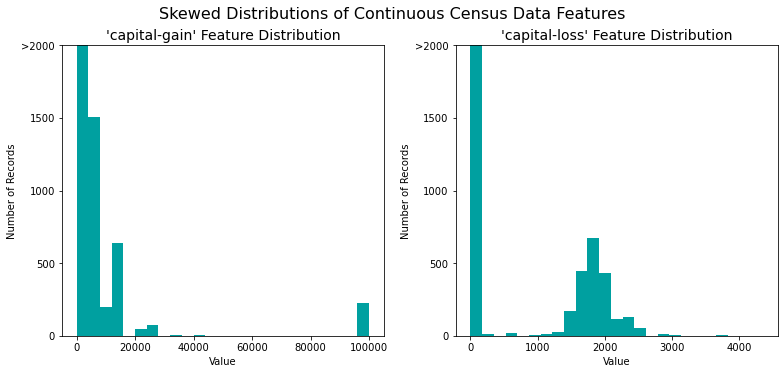

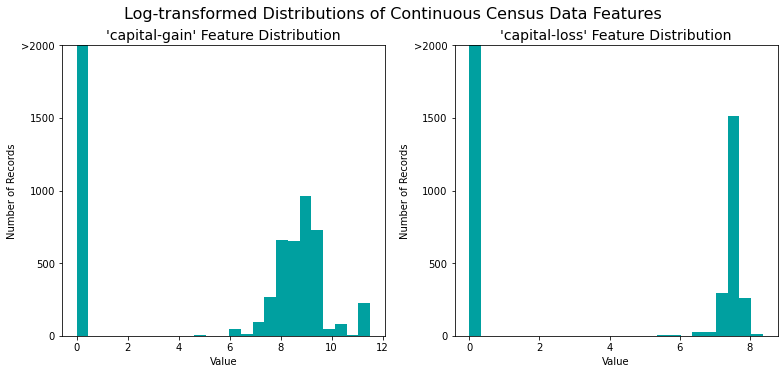

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


0        0
1        0
2        0
3        0
4        0
        ..
45217    0
45218    0
45219    0
45220    0
45221    1
Name: income, Length: 45222, dtype: int64

103 total features after one-hot encoding.

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ 

In [4]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data["income"] == '>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data["income"] == '<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = round((n_greater_50k / n_records)*100, 2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

# Split the data into features and target label
income_raw = data['income']  # 目標
features_raw = data.drop('income', axis = 1)


def distribution(data, transformed=False):
    """
    Visualization code for displaying skewed distributions of features
    """

    # Create figure
    fig = plt.figure(figsize=(11, 5));

    # Skewed feature plotting
    for i, feature in enumerate(['capital-gain', 'capital-loss']):
        ax = fig.add_subplot(1, 2, i + 1)
        ax.hist(data[feature], bins=25, color='#00A0A0')
        ax.set_title("'%s' Feature Distribution" % (feature), fontsize=14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", fontsize=16, y=1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", fontsize=16, y=1.03)

    fig.tight_layout()
    plt.show()


# Visualize skewed continuous features of original data
distribution(data)  # show

# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data=features_raw)  # 套用到DataFrame DS
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))  # 2為基底 ln

# Visualize the new log distributions
distribution(features_log_transformed, transformed=True)  # show

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()  # default=(0, 1) 正規化
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data=features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n=5))  # show

# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)
income = income_raw.replace({'<=50K':0,'>50K':1})
print(income)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("\n", end='')
print("{} total features after one-hot encoding.".format(len(encoded)))
# Uncomment the following line to see the encoded feature names
print("\n", end='')
print(encoded)


# TODO: import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets.
# 80% of the data will be used for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print("\n", end='')
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

TP = np.sum( income )
FP = len(income) - TP
TN = 0
FN = 0

# TODO: Calculate accuracy, precision and recall
accuracy =  ( TP + TN ) / ( TP + TN + FP + FN )
recall = TP / ( TP + FN )
precision = TP / ( TP + FP )

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = ( 1 + beta**2 ) * ((precision*recall) / (beta**2 * precision+recall) )

# Print the results
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

In [5]:
print("Question 2:")
print("SVM: 支援多維度向量。")
print("KNN: 計算方式簡單，但容易受鄰近neighbor影響結果。")
print("SGD: 適合拿來做分類的預測。")

Question 2:
SVM: 支援多維度向量。
KNN: 計算方式簡單，但容易受鄰近neighbor影響結果。
SGD: 適合拿來做分類的預測。


SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.
SGDClassifier trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.
{
  "SVC": {
    "0": {
      "train_time": 0.034517765045166016,
      "pred_time": 0.5526878833770752,
      "acc_train": 0.8533333333333334,
      "acc_test": 0.8180210060807076,
      "f_train": 0.732758620689655,
      "f_test": 0.6277580071174378
    },
    "1": {
      "train_time": 2.002539873123169,
      "pred_time": 3.955944776535034,
      "acc_train": 0.86,
      "acc_test": 0.8316196793808734,
      "f_train": 0.7352941176470589,
      "f_test": 0.662986635676932
    },
    "2": {
      "train_time": 218.86320614814758,
      "pred_time": 38.002625465393066,
      "acc_train": 0.8533333333333334,
      "acc_test": 0.8423438363736871,
  

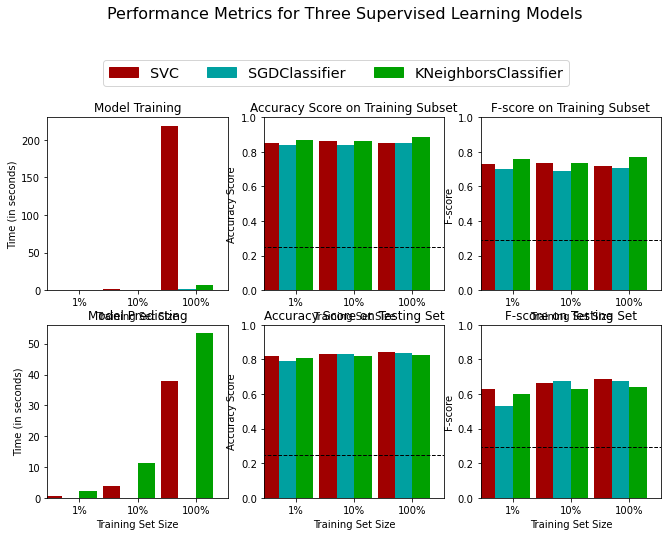

In [6]:
from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''

    results = {}

    start = time()  # Get start time

    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])

    end = time()  # Get end time

    # TODO: Calculate the training time
    results['train_time'] = end - start

    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time()  # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time()  # Get end time

    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start

    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)

    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)

    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train, beta = 0.5)

    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)

    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

    # Return the results
    return results


def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.

    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """

    # Create figure
    fig, ax = plt.subplots(2, 3, figsize=(11, 7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000', '#00A0A0', '#00A000']

    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                # Creative plot code
                ax[j // 3, j % 3].bar(i + k * bar_width, results[learner][i][metric], width=bar_width, color=colors[k])
                ax[j // 3, j % 3].set_xticks([0.45, 1.45, 2.45])
                ax[j // 3, j % 3].set_xticklabels(["1%", "10%", "100%"])
                ax[j // 3, j % 3].set_xlabel("Training Set Size")
                ax[j // 3, j % 3].set_xlim((-0.1, 3.0))

    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")

    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")

    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y=accuracy, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
    ax[1, 1].axhline(y=accuracy, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
    ax[0, 2].axhline(y=f1, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
    ax[1, 2].axhline(y=f1, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')

    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color=colors[i], label=learner))
    plt.legend(handles=patches, bbox_to_anchor=(-.80, 2.53), \
               loc='upper center', borderaxespad=0., ncol=3, fontsize='x-large')

    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize=16, y=1.10)
    plt.show()



# print results in beautyful format
import json

# TODO: Import the three supervised learning models from sklearn
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

# TODO: Initialize the three models
clf_A = svm.SVC(random_state = 7)
clf_B = SGDClassifier(random_state = 7)
clf_C = KNeighborsClassifier()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(samples_100 * 0.1)
samples_1 = int(samples_100 * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

print(json.dumps(results, indent=2))

# Run metrics visualization for the three supervised learning models chosen
evaluate(results, accuracy, fscore)

In [7]:
print("Question 3:")
print("100% fscore分別為: KNN: 0.64, SGD: 0.67, SVC: 0.68")
print("我會選擇SGD，因為SGD所需分析時間最短，且結果只輸SVC一點點。")

Question 3:
100% fscore分別為: KNN: 0.64, SGD: 0.67, SVC: 0.68
我會選擇SGD，因為SGD所需分析時間最短，且結果只輸SVC一點點。


In [8]:
print("Question 4:")
print("先把資料分成test與train，並把train資料放入SGD分析，透過梯度下降找到最符合所有training set的函數解，也就是所有點都在此函數上(與函數距離和為0，即碗公底部)。")

Question 4:
先把資料分成test與train，並把train資料放入SGD分析，透過梯度下降找到最符合所有training set的函數解，也就是所有點都在此函數上(與函數距離和為0，即碗公底部)。


In [9]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = SGDClassifier(random_state = 7)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'loss': ['hinge', 'log'], 'penalty': ['none', 'l2', 'l1', 'elasticnet'], 'alpha': [0.0001,0.001,0.01, 0.1, 1.0] }

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters,scoring = scorer )

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8392
F-score on testing data: 0.6762

Optimized Model
------
Final accuracy score on the testing data: 0.8397
Final F-score on the testing data: 0.6790


In [10]:
print("Question 5:")
print("Accuracy score從0.8392變為0.8397，F-score從0.6762變為0.679。")
print("Accuracy score和F-score都比原本更加優化。")
print("SGD最佳化後的結果更接近於SVC的0.68。")

Question 5:
Accuracy score從0.8392變為0.8397，F-score從0.6762變為0.679。
Accuracy score和F-score都比原本更加優化。
SGD最佳化後的結果更接近於SVC的0.68。


In [11]:
print("Question 6:")
print("1.Work class: 社會階級越高，能夠獲得的錢財越多，越有可能提供更高的捐款。")
print("2.Occupation: 較高薪資水平的工作，可以提供更多的薪水。")
print("3.Capital gain: 資本利得，如果有較高的資本利得意味著有更好的投資理財觀念，有可能有更多的錢財。")
print("4.Education level: 越高等級的教育程度，獲得更多錢財的可能性更高。")
print("5.Age: 隨著年紀越大，在一家公司待得越久自然薪水會調漲，就有更多錢財(但年輕的人也可能起薪就比其他工作的長者高)")

Question 6:
1.Work class: 社會階級越高，能夠獲得的錢財越多，越有可能提供更高的捐款。
2.Occupation: 較高薪資水平的工作，可以提供更多的薪水。
3.Capital gain: 資本利得，如果有較高的資本利得意味著有更好的投資理財觀念，有可能有更多的錢財。
4.Education level: 越高等級的教育程度，獲得更多錢財的可能性更高。
5.Age: 隨著年紀越大，在一家公司待得越久自然薪水會調漲，就有更多錢財(但年輕的人也可能起薪就比其他工作的長者高)


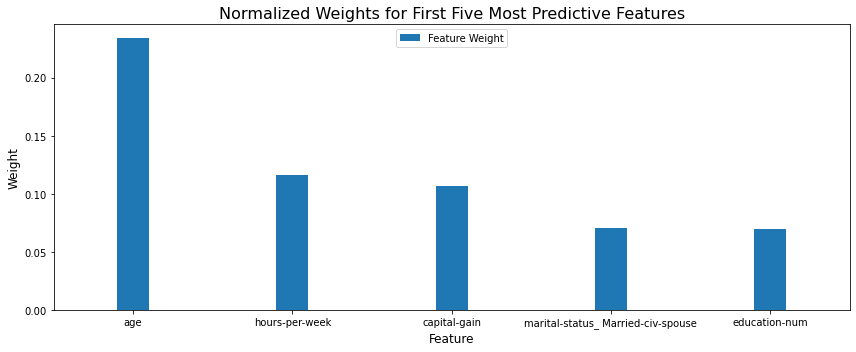

In [13]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier().fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_
importances = model.feature_importances_

# Plot
def feature_plot(importances, X_train, y_train):
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:11]]
    values = importances[indices][:11]

    # Creat the plot
    fig = plt.figure(figsize=(12, 5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize=16)
    plt.bar(np.arange(11), values, width=0.2, align="center", label="Feature Weight")
    # plt.bar(np.arange(11) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
    #       label = "Cumulative Feature Weight")
    plt.xticks(np.arange(11), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize=12)
    plt.xlabel("Feature", fontsize=12)

    plt.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

feature_plot(importances, X_train, y_train)

In [14]:
print("Question 7:")
print("只猜中Age, capital-gain，不確定eduacation-num與education level之間是否有關連。")
print("也許捐款這種事只有結婚後有家庭的人才會注意到需要幫助他人，沒結婚的人捐款的比例比較低。使得有結婚的人成為feature。")

Question 7:
只猜中Age, capital-gain，不確定eduacation-num與education level之間是否有關連。
也許捐款這種事只有結婚後有家庭的人才會注意到需要幫助他人，沒結婚的人捐款的比例比較低。使得有結婚的人成為feature。


In [15]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8397
F-score on testing data: 0.6790

Final Model trained on reduced data
------
Accuracy on testing data: 0.8255
F-score on testing data: 0.6459


In [16]:
print("Question 8:")
print("刪除一些沒那麼高指標性的features後，F-score反而稍微降低了，但所需時間也變短了。")
print("如果需要在有限時間內得到訓練模型，且成果的分數也不會降低太多的話，減少非必要特徵是可接受的。")

Question 8:
刪除一些沒那麼高指標性的features後，F-score反而稍微降低了，但所需時間也變短了。
如果需要在有限時間內得到訓練模型，且成果的分數也不會降低太多的話，減少非必要特徵是可接受的。
